# V7 Training Metrics Visualization

This notebook provides a visual analysis of the YOLOv8n training run for the V7 Vehicle Detector. It loads the `yolo_v7_metrics.csv` file and generates comparison plots for loss and accuracy metrics.

In [1]:
import sys
print(sys.executable)

c:\Users\admin\AppData\Local\Programs\Python\Python310\python.exe


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

## 1. Load Data
We load the CSV generated by the Ultralytics training process.

In [3]:
csv_path = 'yolo_v7_metrics.csv'
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    # Clean column names (strip leading/trailing whitespace if any)
    df.columns = [c.strip() for c in df.columns]
    print(f"Successfully loaded metrics for {len(df)} epochs.")
    display(df.head())
else:
    print(f"Error: {csv_path} not found in current directory.")

Successfully loaded metrics for 50 epochs.


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,102.579,1.16387,1.68037,0.90892,0.89634,0.37943,0.63813,0.45081,1.02149,2.30857,0.85099,0.000655,0.000655,0.000655
1,2,209.965,1.06346,0.95190,0.88675,0.77162,0.72185,0.74964,0.52248,1.00211,1.34013,0.84817,0.001295,0.001295,0.001295
2,3,281.458,1.06146,0.86915,0.88007,0.78644,0.78676,0.83272,0.55446,1.00119,0.90191,0.85072,0.001910,0.001910,0.001910
3,4,352.347,1.03444,0.84824,0.87199,0.79043,0.81826,0.85912,0.59229,0.94433,0.90079,0.84423,0.001881,0.001881,0.001881
4,5,424.355,1.00733,0.81001,0.87116,0.80398,0.81810,0.86301,0.63026,0.87172,0.76453,0.83315,0.001842,0.001842,0.001842


## 2. Loss Curves
We track Box Loss (localization accuracy) and Class Loss (classification confidence) for both training and validation sets.

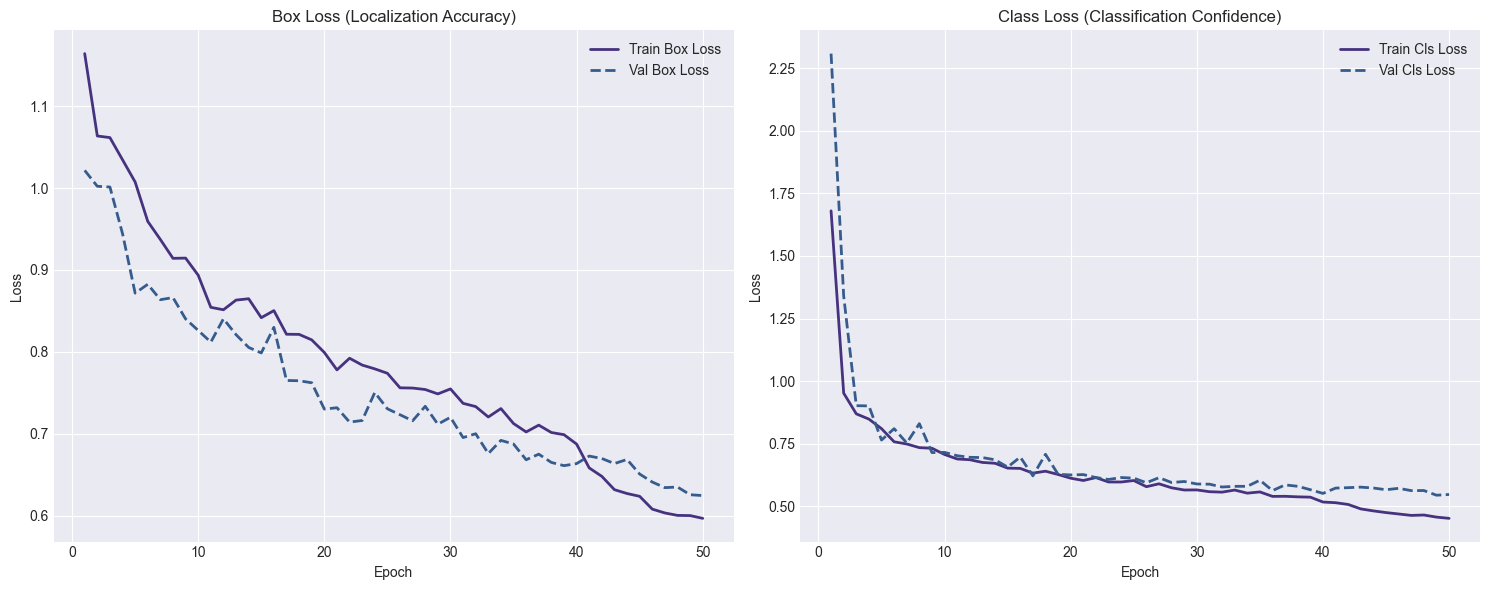

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Box Loss
ax1.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', lw=2)
ax1.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', lw=2, linestyle='--')
ax1.set_title('Box Loss (Localization Accuracy)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Class Loss
ax2.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss', lw=2)
ax2.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss', lw=2, linestyle='--')
ax2.set_title('Class Loss (Classification Confidence)')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

## 3. Precision & Recall
These metrics show the trade-off between false alarms (Precision) and missed detections (Recall).

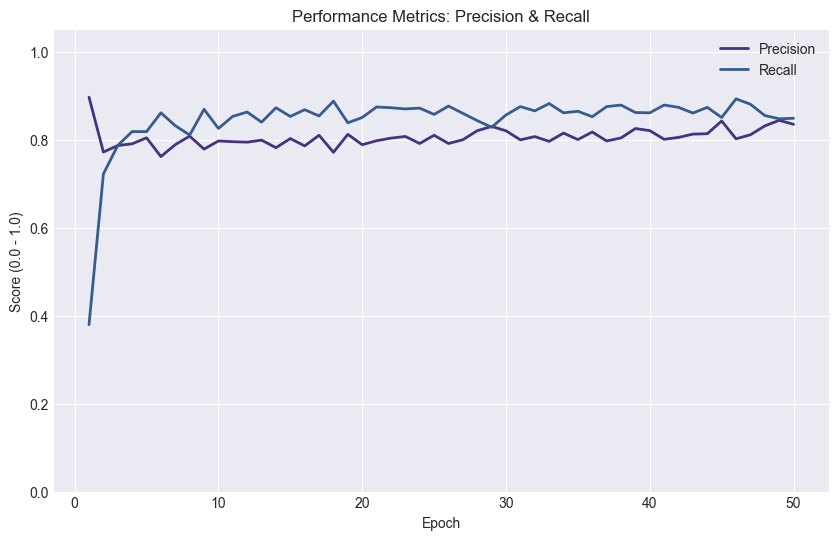

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision', lw=2)
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall', lw=2)
plt.title('Performance Metrics: Precision & Recall')
plt.xlabel('Epoch')
plt.ylabel('Score (0.0 - 1.0)')
plt.ylim(0, 1.05)
plt.legend()
plt.show()

## 4. Mean Average Precision (mAP)
The definitive metrics for object detection. 
- **mAP50**: Accuracy at 50% Overlap (IoU).
- **mAP50-95**: Average accuracy across overlap thresholds from 50% to 95% (Strictness/Tightness metric).

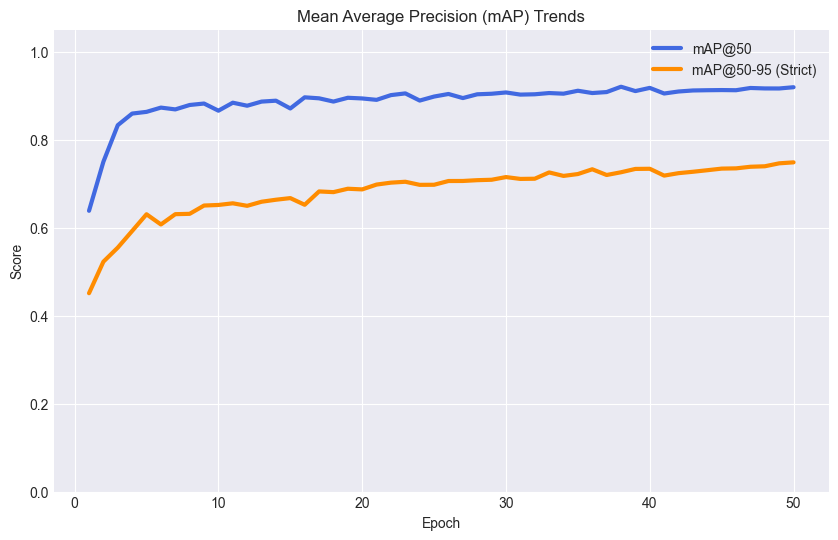

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50', lw=3, color='royalblue')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95 (Strict)', lw=3, color='darkorange')
plt.title('Mean Average Precision (mAP) Trends')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.legend()
plt.show()

## 5. Summary of Best Results
Extracting the peak performance values achieved during the 50-epoch run.

In [7]:
best_map50 = df['metrics/mAP50(B)'].max()
best_map50_95 = df['metrics/mAP50-95(B)'].max()
max_precision = df['metrics/precision(B)'].max()
max_recall = df['metrics/recall(B)'].max()

print("=== V7 FINAL PERFORMANCE SUMMARY ===")
print(f"Best mAP50:      {best_map50:.4f}")
print(f"Best mAP50-95:   {best_map50_95:.4f}")
print(f"Max Precision:   {max_precision:.4f}")
print(f"Max Recall:      {max_recall:.4f}")

=== V7 FINAL PERFORMANCE SUMMARY ===
Best mAP50:      0.9201
Best mAP50-95:   0.7483
Max Precision:   0.8963
Max Recall:      0.8926
